In [ ]:
import tensorflow as tf
import os
print(tf.__version__)


In [ ]:
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

physical_devices = tf.config.list_physical_devices("GPU")
print(physical_devices)
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [ ]:
import pandas as pd
import csv
import numpy as np

#put the location of the dataset variable here
dataset_path = "shoulder.csv"

df = pd.read_csv(dataset_path)
df.head()

,x1,y1,z1,v1,x2,y2,z2,v2,x3,y3,z3,v3,x4,y4,z4,v4,x5,y5,z5,v5,x6,y6,z6,v6,x7,y7,z7,v7,x8,y8,z8,v8,x9,y9,z9,v9,x10,y10,z10,v10,...,y16,z16,v16,x17,y17,z17,v17,x18,y18,z18,v18,x19,y19,z19,v19,x20,y20,z20,v20,x21,y21,z21,v21,x22,y22,z22,v22,x23,y23,z23,v23,x24,y24,z24,v24,x25,y25,z25,v25,class
0,0.519697,0.415506,-0.355288,1,0.529913,0.396780,-0.317828,1,0.537086,0.397794,-0.317767,0.999997,0.544437,0.398923,-0.317917,1,0.509862,0.395109,-0.321362,1,0.501935,0.394031,-0.321128,0.999992,0.494120,0.393334,-0.321069,1,0.552215,0.415461,-0.133947,0.999999,0.482804,0.407931,-0.156052,0.999966,0.532829,0.439899,-0.291214,0.999942,...,0.148706,-0.282053,0.995685,0.418933,0.153112,-0.270870,0.959845,0.623067,0.100743,-0.334278,0.981533,0.424525,0.100885,-0.306251,0.879173,0.612209,0.095447,-0.281859,0.979252,0.430034,0.097563,-0.275800,0.872078,0.607806,0.112533,-0.276074,0.986422,0.433571,0.114563,-0.267013,0.909647,0.550860,0.827849,-0.005908,0.999817,0.448019,0.816971,0.006660,0.999722,end
1,0.437403,0.259138,-0.728308,1,0.452632,0.245258,-0.663253,1,0.462694,0.244962,-0.663222,1.000000,0.473092,0.244642,-0.663402,1,0.422581,0.246428,-0.659458,1,0.412687,0.246562,-0.659294,1.000000,0.403056,0.246910,-0.659738,1,0.490053,0.253044,-0.356985,1.000000,0.393402,0.255223,-0.338413,1.000000,0.458801,0.273752,-0.622040,0.999999,...,0.096900,-0.807397,0.995574,0.253866,0.090993,-0.621671,0.981752,0.633483,0.067215,-0.952833,0.937405,0.252770,0.065719,-0.728144,0.883036,0.614310,0.064899,-0.918524,0.941947,0.269736,0.056858,-0.740454,0.898919,0.607258,0.072496,-0.823520,0.950979,0.274612,0.063392,-0.648063,0.919991,0.511372,0.562735,-0.026783,0.999999,0.359318,0.566115,0.027946,1.000000,end
2,0.506284,0.317311,-0.045034,1,0.508218,0.297819,0.013589,1,0.518693,0.296165,0.013497,0.999997,0.529451,0.294475,0.013342,1,0.475378,0.302338,-0.011565,1,0.460971,0.303526,-0.011273,0.999996,0.446665,0.304978,-0.011780,1,0.529614,0.300471,0.304001,1.000000,0.416530,0.314903,0.194334,0.999996,0.525513,0.331115,0.060015,0.999952,...,0.199910,0.223212,0.824302,0.357957,0.224778,0.617947,0.279029,0.619165,0.174658,0.142574,0.754192,0.368682,0.199933,0.608003,0.172613,0.616220,0.172203,0.187479,0.755479,0.373830,0.200196,0.634980,0.174041,0.610520,0.183142,0.220249,0.778858,0.378367,0.210613,0.624798,0.238485,0.602495,0.578380,0.052430,0.999112,0.427411,0.593500,-0.051566,0.998891,end
3,0.494064,0.318308,-0.488567,1,0.500302,0.300549,-0.456702,1,0.504933,0.301045,-0.456555,1.000000,0.509688,0.301591,-0.456366,1,0.486810,0.300690,-0.460312,1,0.481523,0.300355,-0.460239,1.000000,0.476311,0.300322,-0.460508,1,0.513383,0.316897,-0.303659,1.000000,0.469176,0.315508,-0.322010,1.000000,0.502076,0.340796,-0.435179,0.999999,...,0.100423,-0.464420,0.999510,0.382918,0.112713,-0.389212,0.994341,0.589963,0.066485,-0.529051,0.993394,0.386109,0.076954,-0.432615,0.965512,0.582894,0.055826,-0.518384,0.993433,0.393369,0.066508,-0.428488,0.968630,0.579491,0.066629,-0.473443,0.997900,0.396240,0.076921,-0.394347,0.983217,0.519665,0.698687,0.002730,0.999993,0.454564,0.699848,-0.001852,0.999998,end
4,0.478596,0.221590,-0.206071,1,0.484544,0.202985,-0.184162,1,0.489047,0.202675,-0.184161,1.000000,0.493687,0.202418,-0.184182,1,0.472176,0.203964,-0.182076,1,0.467759,0.203924,-0.181989,1.000000,0.463353,0.204133,-0.182180,1,0.500172,0.212460,-0.078179,1.000000,0.458207,0.214364,-0.067886,1.000000,0.487332,0.240345,-0.168817,1.000000,...,0.086136,-0.496338,0.968980,0.417170,0.071631,-0.526740,0.961553,0.561018,0.049051,-0.555411,0.855256,0.417730,0.043054,-0.590309,0.871189,0.558187,0.041973,-0.547241,0.879443,0.420755,0.036127,-0.582203,0.886441,0.553868,0.055200,-0.504587,0.897253,0.424066,0.046955,-0.535834,0.917349,0.509724,0.608818,-0.004847,0.999997,0.441660,0.607802,0.005408,0.999999,end


In [ ]:
y = np.array(df["class"])
x = np.array(df.drop("class", axis = "columns"))
print(x)
print(y)

[[ 0.51969749  0.41550559 -0.35528815 ...  0.81697059  0.00666015
   0.99972242]
 [ 0.4374032   0.25913808 -0.72830796 ...  0.56611514  0.02794625
   0.99999952]
 [ 0.50628442  0.31731117 -0.04503418 ...  0.59349978 -0.05156643
   0.99889058]
 ...
 [ 0.49001759  0.45506248 -0.16440715 ...  0.90016347  0.02168277
   0.99645126]
 [ 0.48973221  0.45618114 -0.18152569 ...  0.89958763  0.02246016
   0.99710339]
 [ 0.49005279  0.45648554 -0.1841495  ...  0.90020752  0.02228422
   0.99729758]]
['end' 'end' 'end' ... 'other' 'other' 'other']


In [ ]:
import collections
collections.Counter(y)

Counter({'end': 729, 'other': 940, 'start': 1240})

In [ ]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

encoder = LabelEncoder()
y = encoder.fit_transform(y)
y

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
print(x.shape)
print(x[0].shape)
print(x)

(2909, 100)
(100,)
[[ 0.51969749  0.41550559 -0.35528815 ...  0.81697059  0.00666015
   0.99972242]
 [ 0.4374032   0.25913808 -0.72830796 ...  0.56611514  0.02794625
   0.99999952]
 [ 0.50628442  0.31731117 -0.04503418 ...  0.59349978 -0.05156643
   0.99889058]
 ...
 [ 0.49001759  0.45506248 -0.16440715 ...  0.90016347  0.02168277
   0.99645126]
 [ 0.48973221  0.45618114 -0.18152569 ...  0.89958763  0.02246016
   0.99710339]
 [ 0.49005279  0.45648554 -0.1841495  ...  0.90020752  0.02228422
   0.99729758]]


In [ ]:
encoder.classes_

array(['end', 'other', 'start'], dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [ ]:
print(x_train.shape)
print(x_train[0].shape)

(3530, 100)
(100,)


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Change model architecture here
model = Sequential()
model.add(Dense(32, input_dim = x_train[0].shape[0], activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(16, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(len(encoder.classes_), activation='softmax'))

model.summary()

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#Can change the number of epochs here
history = model.fit(x_train, y_train, epochs = 500, validation_data=(x_test,y_test), verbose=0)

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 32)                4256      
_________________________________________________________________
dropout_26 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_53 (Dense)             (None, 16)                528       
_________________________________________________________________
dropout_27 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_54 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_55 (Dense)             (None, 3)                 27        
Total params: 4,947
Trainable params: 4,947
Non-trainable params: 0
___________________________________________________

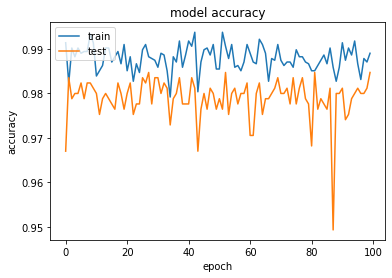

0.9889850616455078
0.9846698045730591


In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
print(history.history['accuracy'][-1])
print(history.history['val_accuracy'][-1])

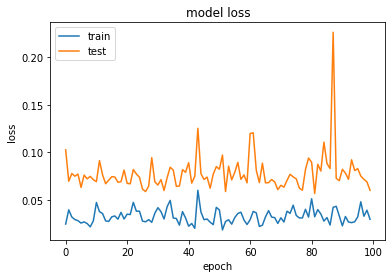

0.029549166560173035
0.0600198432803154


In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
print(history.history['loss'][-1])
print(history.history['val_loss'][-1])

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout

larger_model = Sequential()
larger_model.add(Dense(128, input_dim = x_train[0].shape[0], activation = 'relu'))
larger_model.add(Dropout(0.1))
larger_model.add(Dense(64, activation = 'relu'))
larger_model.add(Dropout(0.1))
larger_model.add(Dense(32, activation = 'relu'))
larger_model.add(Dense(len(encoder.classes_), activation='softmax'))

larger_model.summary()
from tensorflow.keras.utils import plot_model
larger_model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history_larger = larger_model.fit(x_train, y_train, epochs = 500, validation_data=(x_test,y_test), verbose=0)

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_68 (Dense)             (None, 128)               17024     
_________________________________________________________________
dropout_34 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_69 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_35 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_70 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_71 (Dense)             (None, 3)                 99        
Total params: 27,459
Trainable params: 27,459
Non-trainable params: 0
_________________________________________________

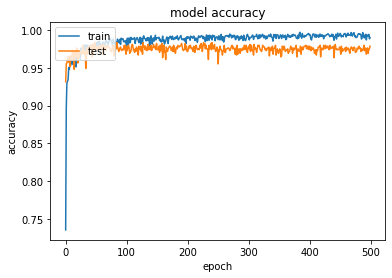

0.9901652336120605
0.9787735939025879


In [ ]:
import matplotlib.pyplot as plt

plt.plot(history_larger.history['accuracy'])
plt.plot(history_larger.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
print(history_larger.history['accuracy'][-1])
print(history_larger.history['val_accuracy'][-1])

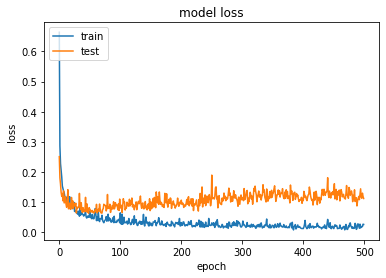

0.02606046013534069
0.11194398254156113


In [ ]:
plt.plot(history_larger.history['loss'])
plt.plot(history_larger.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
print(history_larger.history['loss'][-1])
print(history_larger.history['val_loss'][-1])

In [ ]:
model.save("models/squats_small.h5")

In [ ]:
larger_model.save("models/squats_large.h5")